<a href="https://colab.research.google.com/github/bisat19/data-science/blob/main/Trial_%26_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Waktu eksekusi paralel: 0.09 detik
Waktu eksekusi seri: 0.01 detik


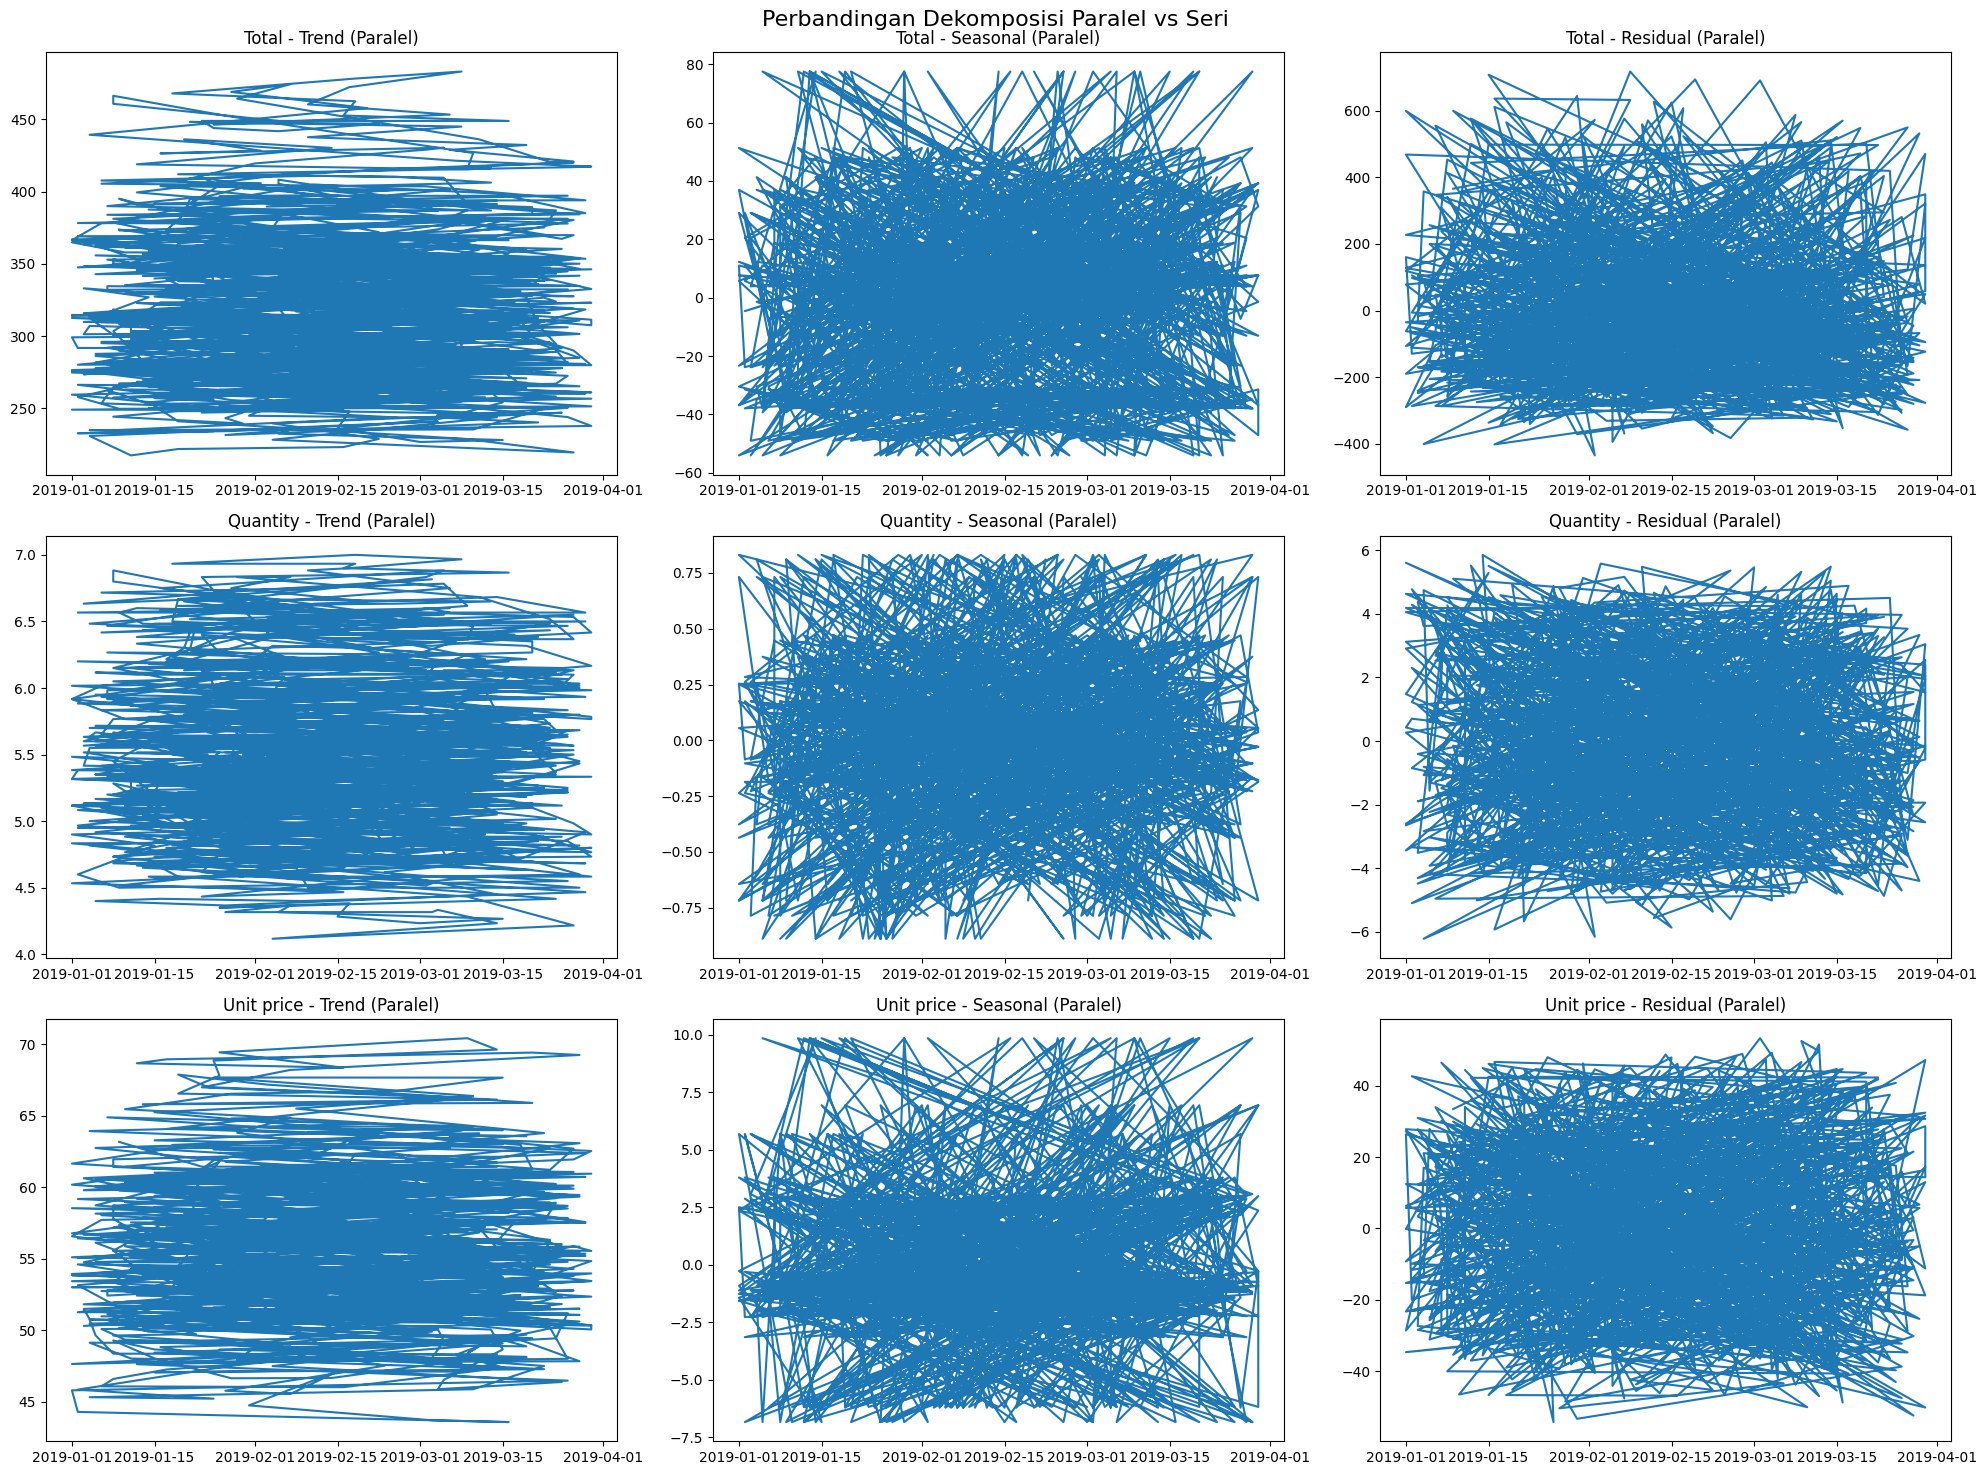

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import time

# Fungsi untuk membaca dan mempersiapkan data
def load_data(file_path):
    df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Fungsi untuk melakukan dekomposisi pada satu kolom
def decompose_column(args):
    column, data = args
    result = seasonal_decompose(data[column], model='additive', period=30)
    return column, result

# Fungsi untuk dekomposisi paralel
def parallel_decomposition(df):
    columns_to_decompose = ['Total', 'Quantity', 'Unit price']

    with Pool(processes=cpu_count()) as pool:
        results = pool.map(decompose_column, [(col, df) for col in columns_to_decompose])

    return dict(results)

# Fungsi untuk dekomposisi seri
def serial_decomposition(df):
    columns_to_decompose = ['Total', 'Quantity', 'Unit price']
    results = {}

    for column in columns_to_decompose:
        result = seasonal_decompose(df[column], model='additive', period=30)
        results[column] = result

    return results

# Fungsi utama
def main():
    # Ganti dengan path file CSV Anda
    file_path = 'supermarket_sales.csv'
    df = load_data(file_path)

    # Dekomposisi paralel
    start_time = time.time()
    parallel_results = parallel_decomposition(df)
    parallel_time = time.time() - start_time
    print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")

    # Dekomposisi seri
    start_time = time.time()
    serial_results = serial_decomposition(df)
    serial_time = time.time() - start_time
    print(f"Waktu eksekusi seri: {serial_time:.2f} detik")

    # Visualisasi hasil
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    fig.suptitle('Perbandingan Dekomposisi Paralel vs Seri', fontsize=16)

    for idx, column in enumerate(['Total', 'Quantity', 'Unit price']):
        parallel_result = parallel_results[column]
        serial_result = serial_results[column]

        # Plot hasil paralel
        axes[idx, 0].plot(parallel_result.trend)
        axes[idx, 0].set_title(f'{column} - Trend (Paralel)')
        axes[idx, 1].plot(parallel_result.seasonal)
        axes[idx, 1].set_title(f'{column} - Seasonal (Paralel)')
        axes[idx, 2].plot(parallel_result.resid)
        axes[idx, 2].set_title(f'{column} - Residual (Paralel)')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Waktu eksekusi paralel: 0.07 detik
Waktu eksekusi seri: 0.01 detik


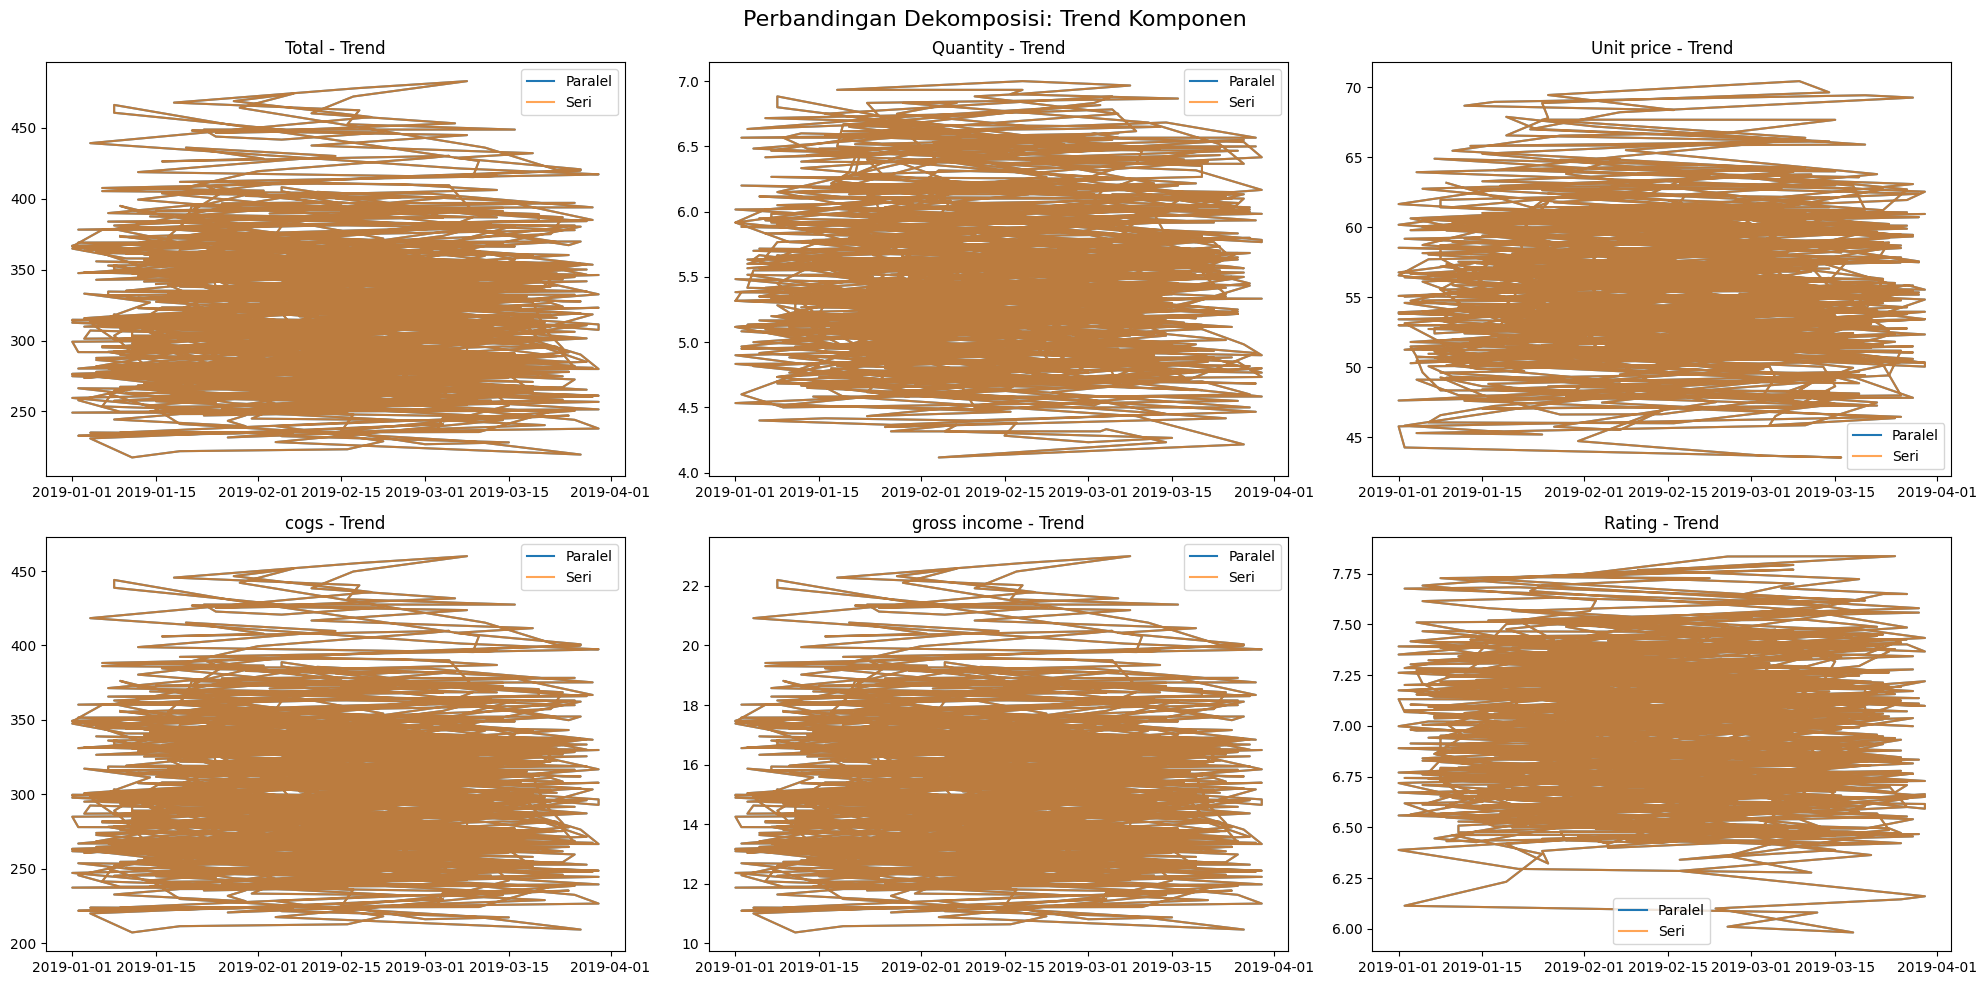

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import time

def load_data(file_path):
    df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

def decompose_column(args):
    column, data = args
    result = seasonal_decompose(data[column], model='additive', period=30)
    return column, result

def chunked_parallel_decomposition(df, chunk_size=3):
    columns_to_decompose = ['Total', 'Quantity', 'Unit price', 'cogs', 'gross income', 'Rating']
    results = {}

    with Pool(processes=cpu_count()) as pool:
        for i in range(0, len(columns_to_decompose), chunk_size):
            chunk = columns_to_decompose[i:i+chunk_size]
            chunk_results = pool.map(decompose_column, [(col, df) for col in chunk])
            results.update(dict(chunk_results))

    return results

def serial_decomposition(df):
    columns_to_decompose = ['Total', 'Quantity', 'Unit price', 'cogs', 'gross income', 'Rating']
    results = {}

    for column in columns_to_decompose:
        result = seasonal_decompose(df[column], model='additive', period=30)
        results[column] = result

    return results

def main():
    file_path = 'supermarket_sales.csv'
    df = load_data(file_path)

    # Warm-up run
    _ = chunked_parallel_decomposition(df)
    _ = serial_decomposition(df)

    # Parallel decomposition
    start_time = time.time()
    parallel_results = chunked_parallel_decomposition(df)
    parallel_time = time.time() - start_time
    print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")

    # Serial decomposition
    start_time = time.time()
    serial_results = serial_decomposition(df)
    serial_time = time.time() - start_time
    print(f"Waktu eksekusi seri: {serial_time:.2f} detik")

    # Visualization (simplified for brevity)
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle('Perbandingan Dekomposisi: Trend Komponen', fontsize=16)

    for idx, column in enumerate(['Total', 'Quantity', 'Unit price', 'cogs', 'gross income', 'Rating']):
        row = idx // 3
        col = idx % 3
        axes[row, col].plot(parallel_results[column].trend, label='Paralel')
        axes[row, col].plot(serial_results[column].trend, label='Seri', alpha=0.7)
        axes[row, col].set_title(f'{column} - Trend')
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Waktu eksekusi paralel: 0.10 detik
Waktu eksekusi seri: 0.01 detik


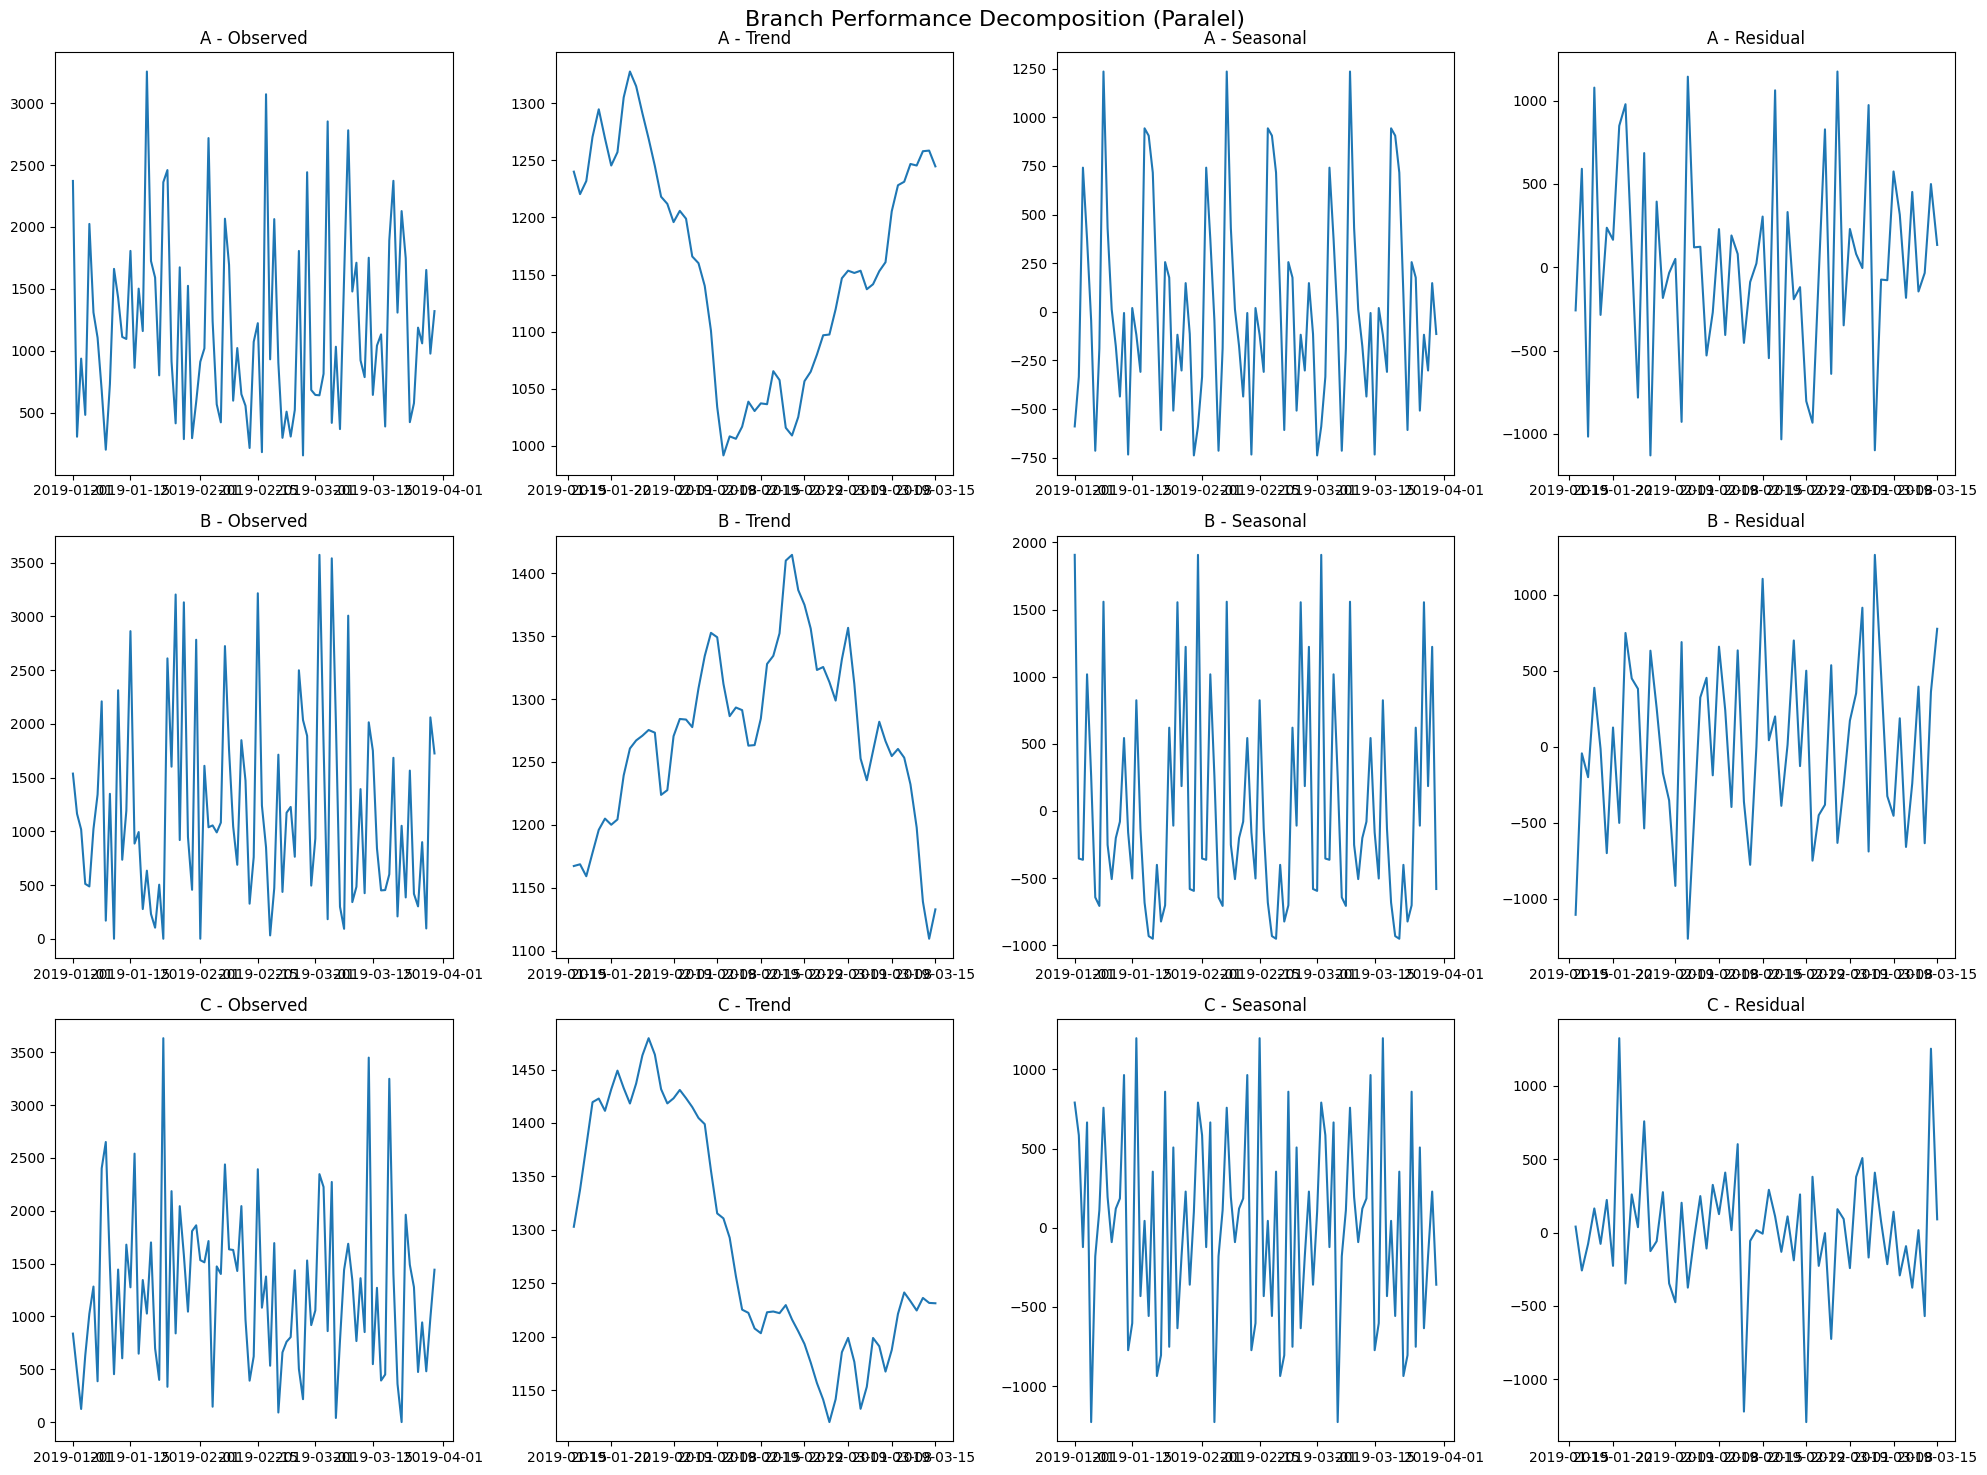

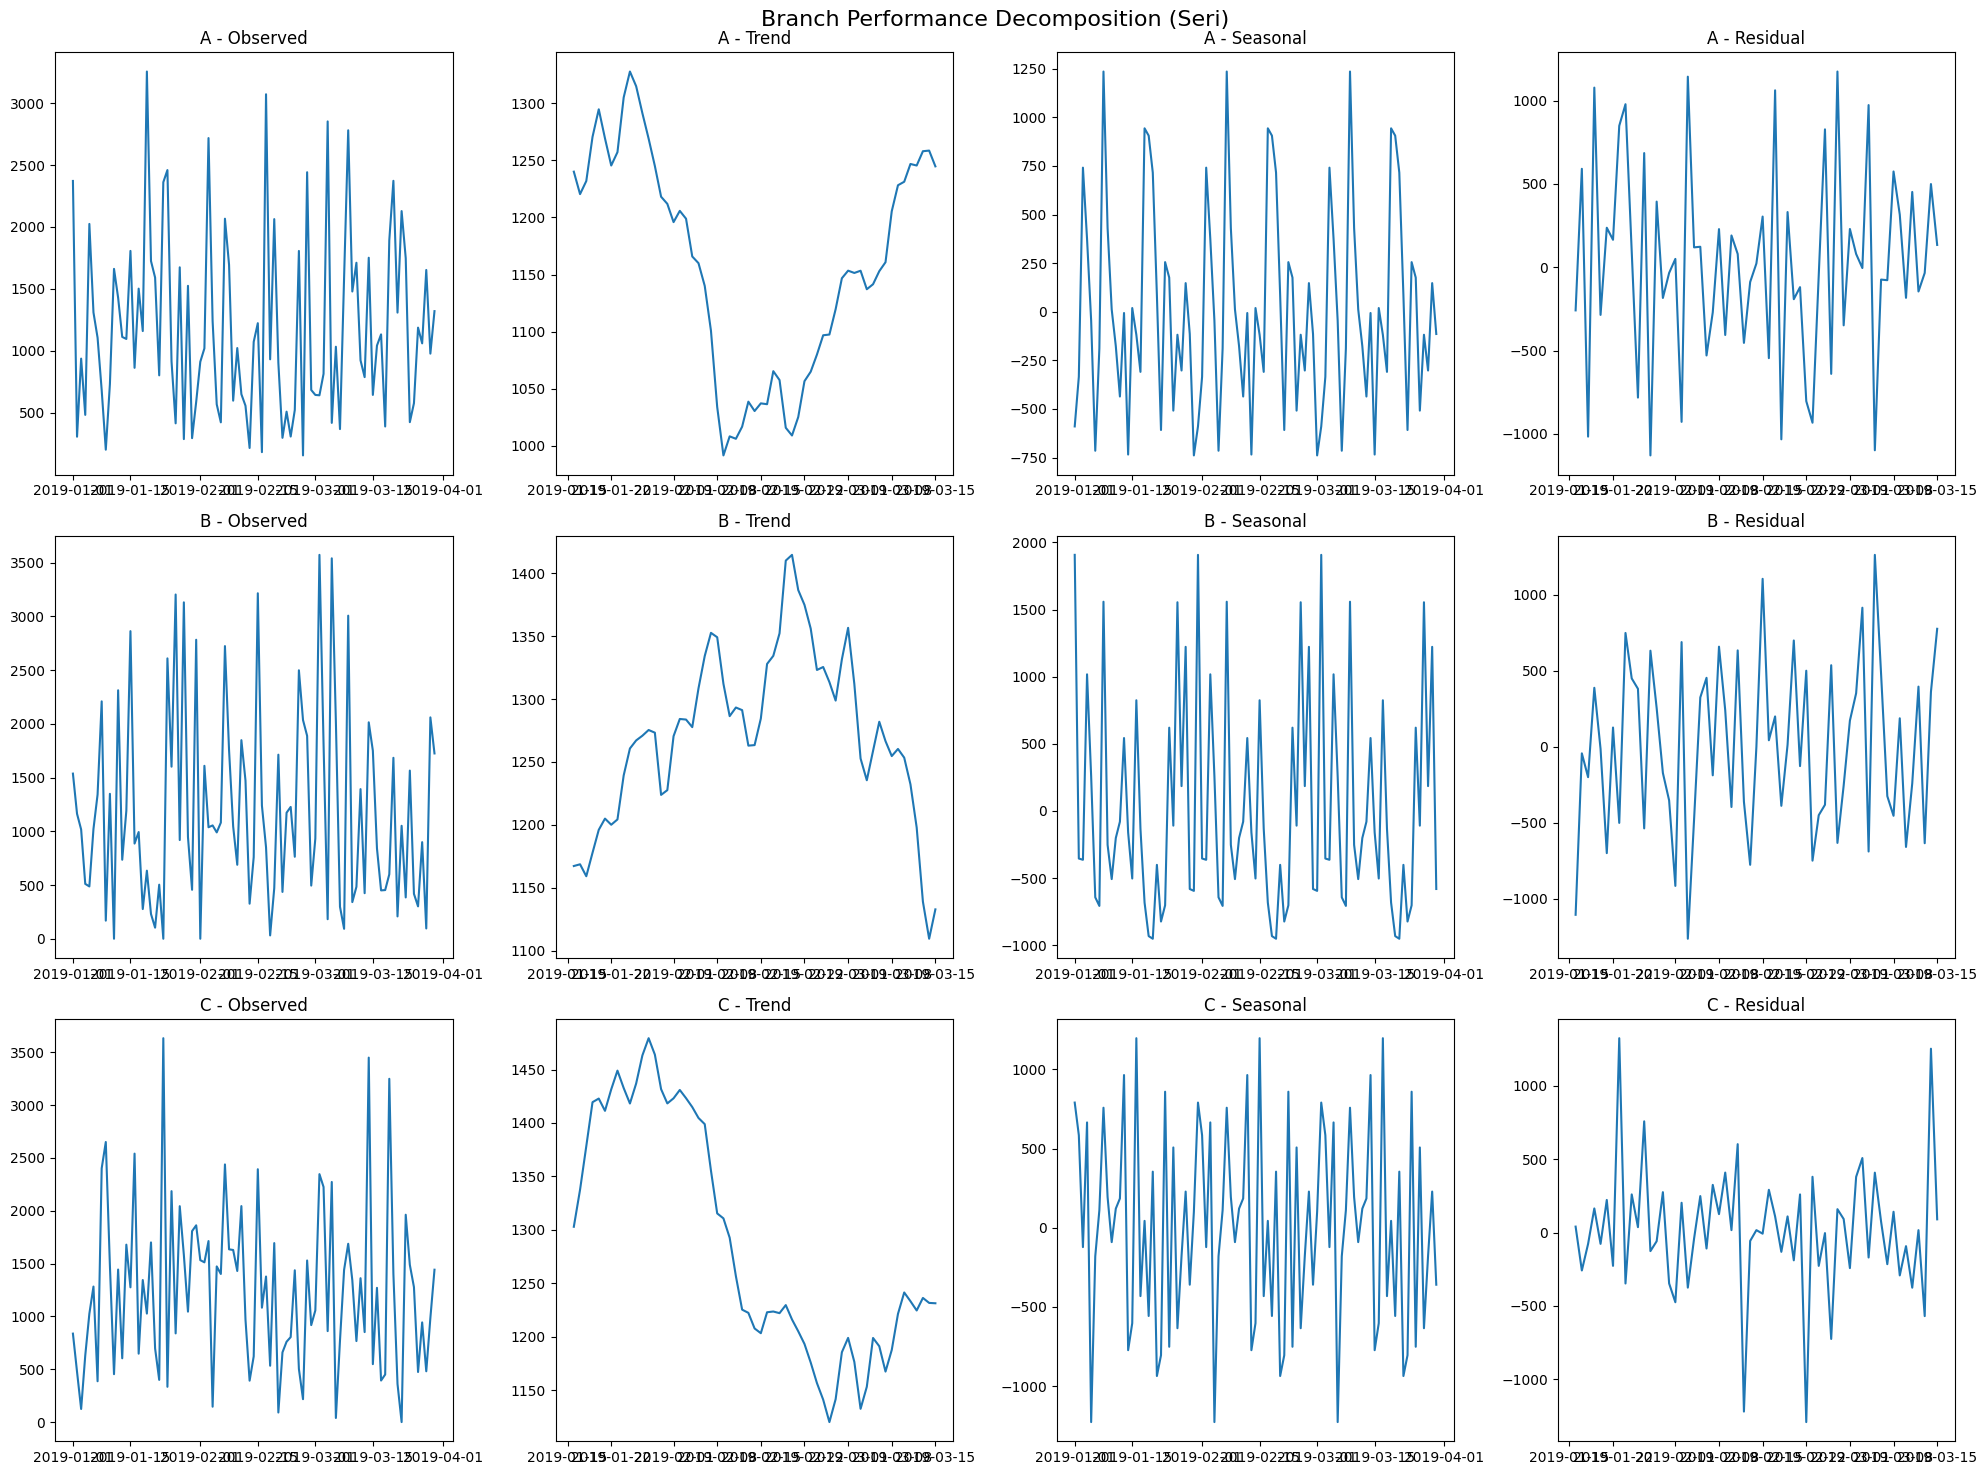

Rata-rata perbedaan trend untuk A: 0.00
Rata-rata perbedaan trend untuk B: 0.00
Rata-rata perbedaan trend untuk C: 0.00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import time

def load_data(file_path):
    df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    return df

def prepare_branch_data(df):
    # Agregasi data per cabang dan tanggal
    branch_data = df.groupby(['Date', 'Branch'])['Total'].sum().unstack(level='Branch')
    branch_data = branch_data.resample('D').sum()  # Resampling ke harian dan mengisi missing values
    return branch_data.fillna(0)

def decompose_branch(args):
    branch, data = args
    result = seasonal_decompose(data, model='additive', period=30)
    return branch, result

def parallel_decomposition(branch_data):
    with Pool(processes=cpu_count()) as pool:
        results = pool.map(decompose_branch, [(col, branch_data[col]) for col in branch_data.columns])
    return dict(results)

def serial_decomposition(branch_data):
    results = {}
    for branch in branch_data.columns:
        result = seasonal_decompose(branch_data[branch], model='additive', period=30)
        results[branch] = result
    return results

def plot_decomposition(results, method):
    branches = list(results.keys())
    fig, axes = plt.subplots(len(branches), 4, figsize=(20, 5*len(branches)))
    fig.suptitle(f'Branch Performance Decomposition ({method})', fontsize=16)

    for idx, branch in enumerate(branches):
        result = results[branch]
        axes[idx, 0].plot(result.observed)
        axes[idx, 0].set_title(f'{branch} - Observed')
        axes[idx, 1].plot(result.trend)
        axes[idx, 1].set_title(f'{branch} - Trend')
        axes[idx, 2].plot(result.seasonal)
        axes[idx, 2].set_title(f'{branch} - Seasonal')
        axes[idx, 3].plot(result.resid)
        axes[idx, 3].set_title(f'{branch} - Residual')

    plt.tight_layout()
    plt.show()

def main():
    file_path = '/content/supermarket_sales - Sheet1.csv'  # Ganti dengan path file Anda
    df = load_data(file_path)
    branch_data = prepare_branch_data(df)

    # Decomposition paralel
    start_time = time.time()
    parallel_results = parallel_decomposition(branch_data)
    parallel_time = time.time() - start_time
    print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")

    # Decomposition seri
    start_time = time.time()
    serial_results = serial_decomposition(branch_data)
    serial_time = time.time() - start_time
    print(f"Waktu eksekusi seri: {serial_time:.2f} detik")

    # Plot hasil
    plot_decomposition(parallel_results, "Paralel")
    plot_decomposition(serial_results, "Seri")

    # Analisis perbandingan
    for branch in branch_data.columns:
        parallel_trend = parallel_results[branch].trend
        serial_trend = serial_results[branch].trend
        trend_diff = np.abs(parallel_trend - serial_trend).mean()
        print(f"Rata-rata perbedaan trend untuk {branch}: {trend_diff:.2f}")

if __name__ == "__main__":
    main()

Waktu eksekusi paralel: 0.12 detik
Waktu eksekusi seri: 0.01 detik


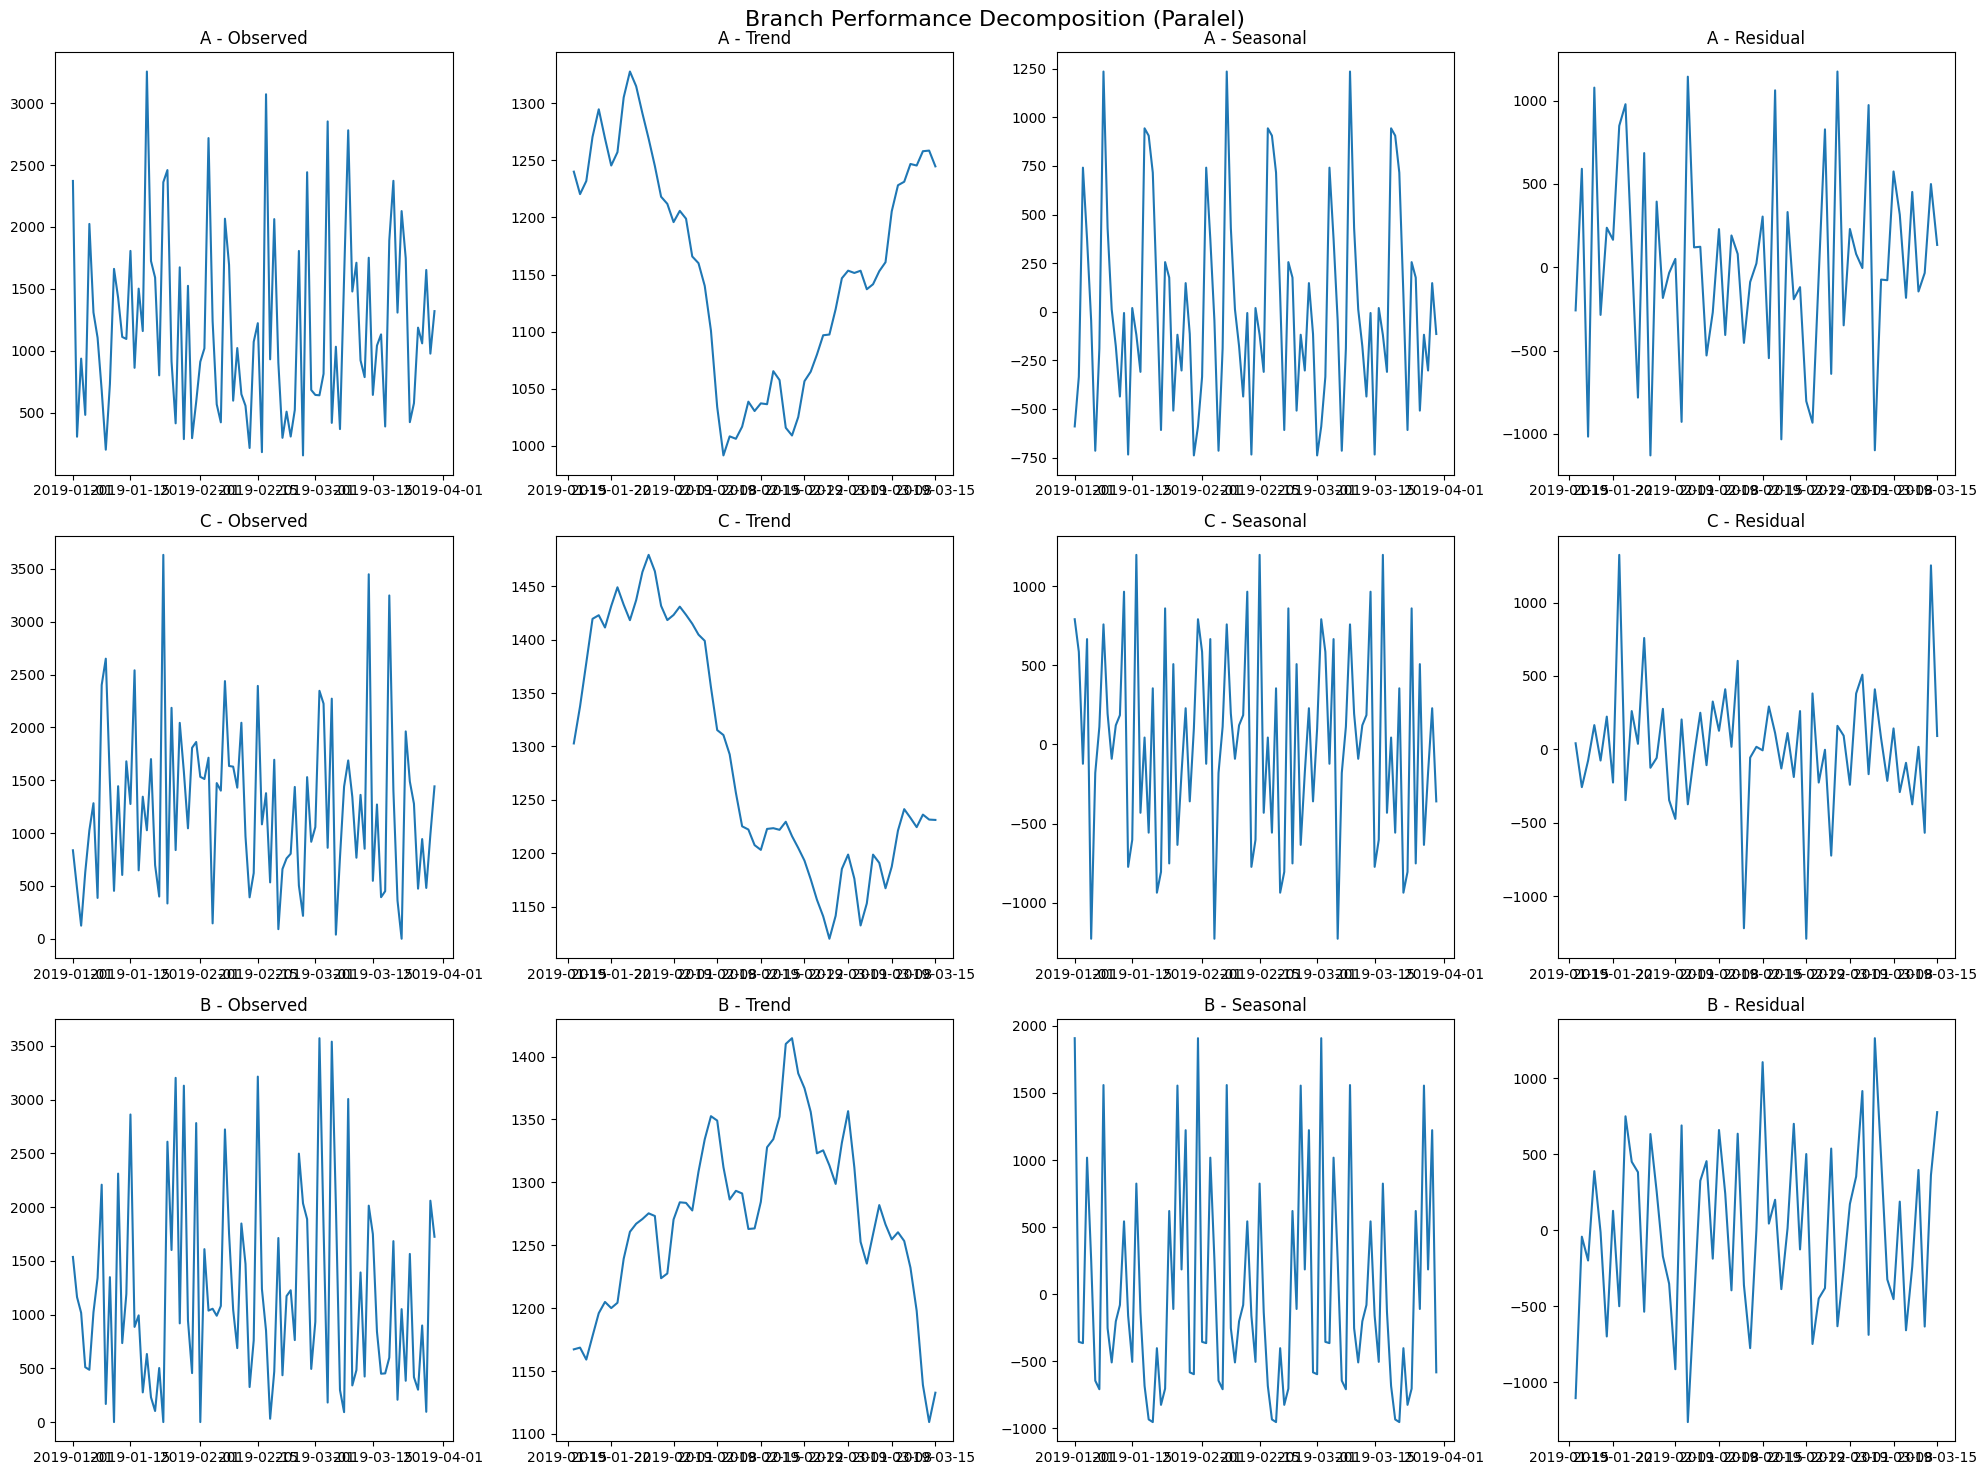

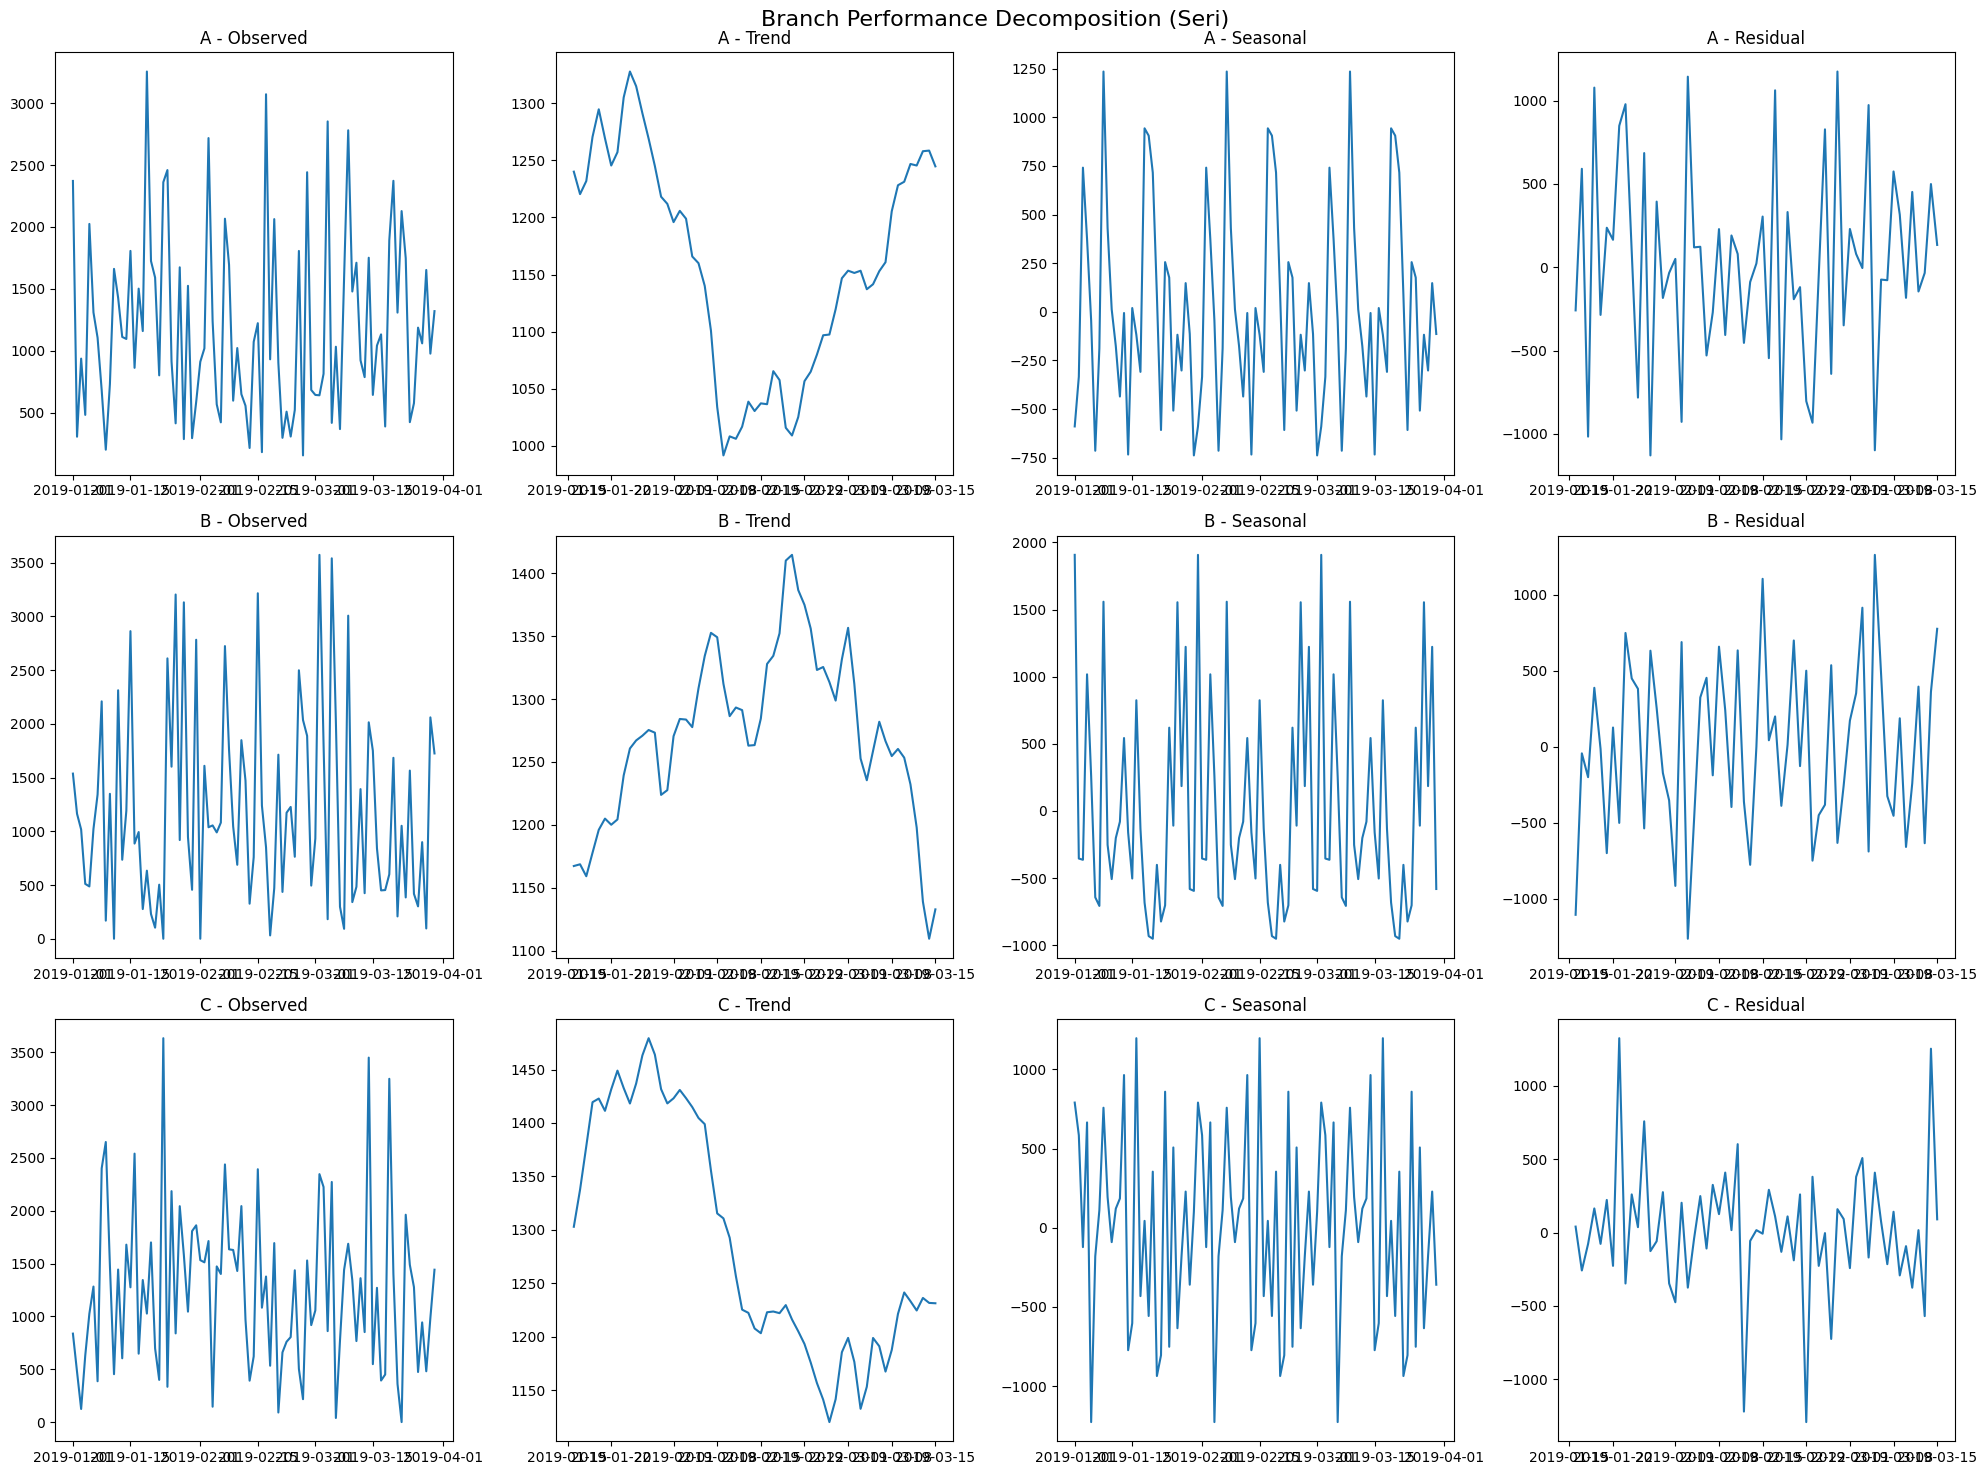

Rata-rata perbedaan trend untuk A: 0.00
Rata-rata perbedaan trend untuk B: 0.00
Rata-rata perbedaan trend untuk C: 0.00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor, as_completed
import time

def load_data(file_path):
    df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    return df

def prepare_branch_data(df):
    branch_data = df.groupby(['Date', 'Branch'])['Total'].sum().unstack(level='Branch')
    branch_data = branch_data.resample('D').sum().fillna(0)
    return branch_data

def decompose_branch(branch, data):
    result = seasonal_decompose(data, model='additive', period=30)
    return branch, result

def parallel_decomposition(branch_data, max_workers=None):
    results = {}
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        future_to_branch = {executor.submit(decompose_branch, branch, data): branch
                            for branch, data in branch_data.items()}
        for future in as_completed(future_to_branch):
            branch = future_to_branch[future]
            results[branch] = future.result()[1]
    return results

def serial_decomposition(branch_data):
    return {branch: seasonal_decompose(data, model='additive', period=30)
            for branch, data in branch_data.items()}

def plot_decomposition(results, method):
    branches = list(results.keys())
    fig, axes = plt.subplots(len(branches), 4, figsize=(20, 5*len(branches)))
    fig.suptitle(f'Branch Performance Decomposition ({method})', fontsize=16)

    for idx, branch in enumerate(branches):
        result = results[branch]
        axes[idx, 0].plot(result.observed)
        axes[idx, 0].set_title(f'{branch} - Observed')
        axes[idx, 1].plot(result.trend)
        axes[idx, 1].set_title(f'{branch} - Trend')
        axes[idx, 2].plot(result.seasonal)
        axes[idx, 2].set_title(f'{branch} - Seasonal')
        axes[idx, 3].plot(result.resid)
        axes[idx, 3].set_title(f'{branch} - Residual')

    plt.tight_layout()
    plt.show()

def main():
    file_path = '/content/supermarket_sales - Sheet1.csv'  # Ganti dengan path file Anda
    df = load_data(file_path)
    branch_data = prepare_branch_data(df)

    # Warm-up run
    _ = parallel_decomposition(branch_data, max_workers=1)
    _ = serial_decomposition(branch_data)

    # Decomposition paralel
    start_time = time.time()
    parallel_results = parallel_decomposition(branch_data)
    parallel_time = time.time() - start_time
    print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")

    # Decomposition seri
    start_time = time.time()
    serial_results = serial_decomposition(branch_data)
    serial_time = time.time() - start_time
    print(f"Waktu eksekusi seri: {serial_time:.2f} detik")

    # Plot hasil
    plot_decomposition(parallel_results, "Paralel")
    plot_decomposition(serial_results, "Seri")

    # Analisis perbandingan
    for branch in branch_data.columns:
        parallel_trend = parallel_results[branch].trend
        serial_trend = serial_results[branch].trend
        trend_diff = np.abs(parallel_trend - serial_trend).mean()
        print(f"Rata-rata perbedaan trend untuk {branch}: {trend_diff:.2f}")

if __name__ == "__main__":
    main()

In [ ]:
df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# prompt: only print the column name in one line with commas

print(','.join(df.columns))


Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


Waktu eksekusi serial: 0.16 detik
Waktu eksekusi paralel: 0.30 detik
Speedup: 0.53x


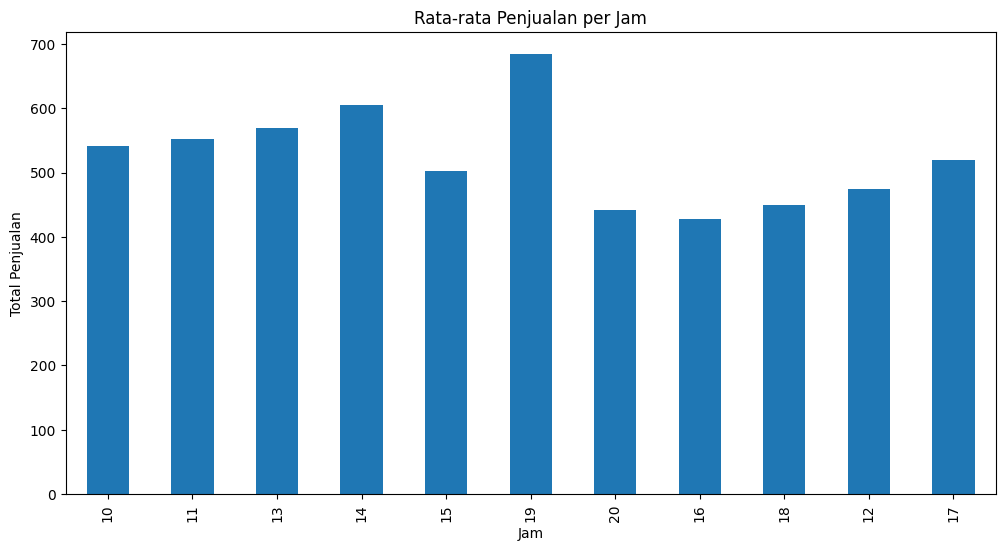

In [ ]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
import time

# Asumsikan data sudah dimuat ke DataFrame df
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

def analyze_time_pattern(group):
    group['Time'] = pd.to_datetime(group['Time'], format='%H:%M:%S')
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales

# Pendekatan Serial
def serial_approach():
    start_time = time.time()
    result = df.groupby('Date').apply(analyze_time_pattern)
    end_time = time.time()
    return result, end_time - start_time

# Pendekatan Exploratory Decomposition
def parallel_approach():
    start_time = time.time()
    date_groups = [group for _, group in df.groupby('Date')]

    with Pool() as pool:
        result = pool.map(analyze_time_pattern, date_groups)

    end_time = time.time()
    return pd.DataFrame(result), end_time - start_time

# Jalankan dan bandingkan kedua pendekatan
serial_result, serial_time = serial_approach()
parallel_result, parallel_time = parallel_approach()

print(f"Waktu eksekusi serial: {serial_time:.2f} detik")
print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")
print(f"Speedup: {serial_time / parallel_time:.2f}x")

# Visualisasi hasil (opsional)
import matplotlib.pyplot as plt

avg_hourly_sales = parallel_result.mean()
plt.figure(figsize=(12, 6))
avg_hourly_sales.plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()

<ipython-input-20-cf86920febe8>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


Waktu eksekusi serial: 0.00 detik
Waktu eksekusi paralel: 0.65 detik
Speedup: 0.00x


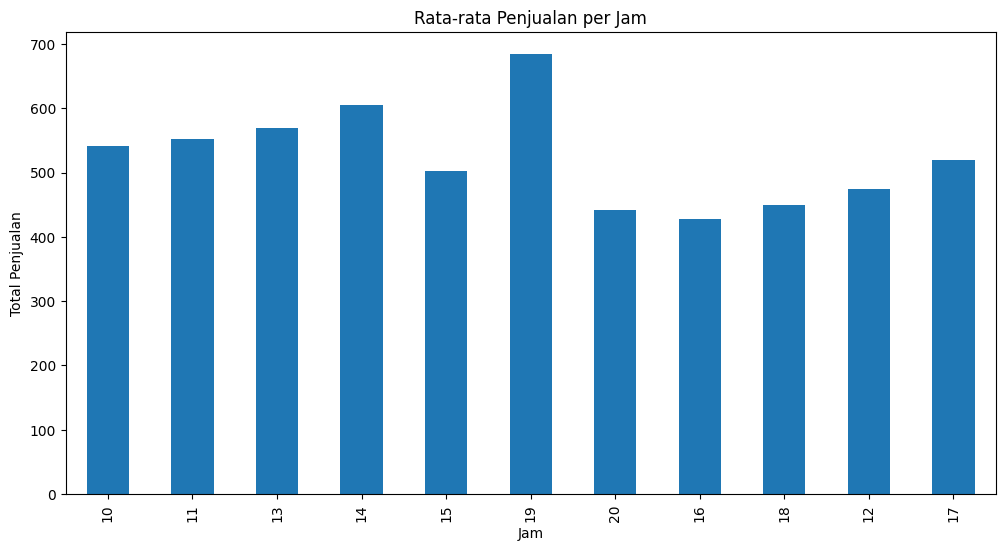

In [ ]:
import pandas as pd
import numpy as np
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Pendekatan Serial
start_time = time.time()
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales

def serial_approach():
    result = df.groupby('Date').apply(analyze_hourly_pattern)
    return result


end_time = time.time()
serial_time = end_time - start_time
serial_result = serial_approach()

print(f"Waktu eksekusi serial: {serial_time:.2f} detik")
print(f"Waktu eksekusi paralel: {parallel_time:.2f} detik")
print(f"Speedup: {serial_time / parallel_time:.2f}x")

# Visualisasi hasil
avg_hourly_sales = parallel_result.mean()
plt.figure(figsize=(12, 6))
avg_hourly_sales.plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-21-85433605db96>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


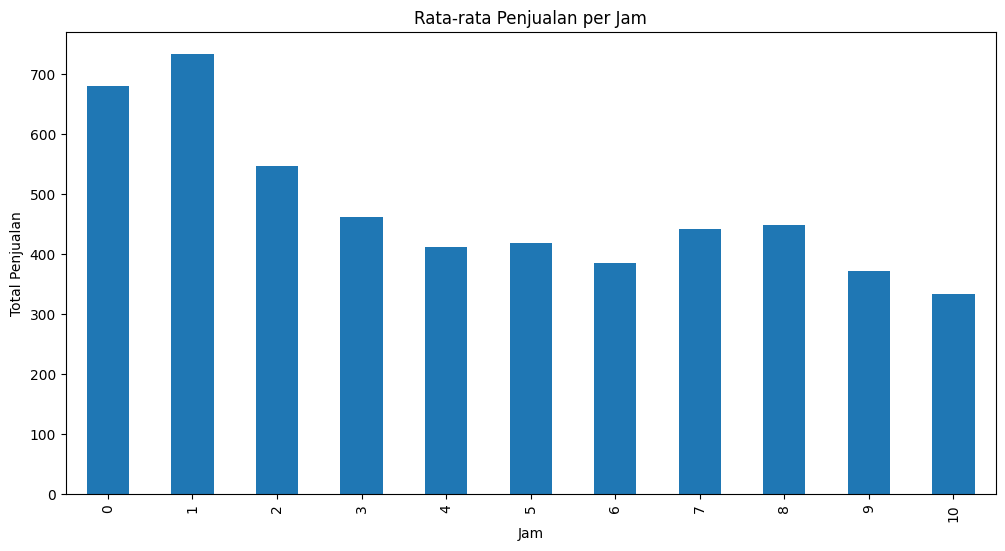

In [ ]:
%time
import dask.dataframe as dd
import pandas as pd
import numpy as np
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt
def analisis():
  start =
  # Baca dataset
  df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
  df['Date'] = pd.to_datetime(df['Date'])
  df['Time'] = pd.to_datetime(df['Time'])

  # Pendekatan Exploratory Decomposition (Paralel)

  def analyze_hourly_pattern(group):
      ddf = dd.from_pandas(group, npartitions=4)
      hourly_sales = ddf.groupby(ddf['Time'].dt.hour)['Total'].sum()
      return hourly_sales

  def parallel_approach():
      date_groups = [group for _, group in df.groupby('Date')]

      with Pool() as pool:
          result = pool.map(analyze_hourly_pattern, date_groups)

      result = pd.DataFrame(result, index=df['Date'].unique())
      return result

# Jalankan dan bandingkan kedua pendekatan
parallel_result = parallel_approach()
# Visualisasi hasil
avg_hourly_sales = parallel_result.mean()
plt.figure(figsize=(12, 6))
avg_hourly_sales.plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Pendekatan Serial
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales
def serial():
  serial_result = df.groupby('Date').apply(analyze_hourly_pattern)
  avg_hourly_sales = serial_result.groupby(level=1).mean()
  return avg_hourly_sales

end_time = time.time()

#Visualisasi
plt.figure(figsize=(12, 6))
serial().plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()
#Waktu
print(f"Waktu eksekusi serial: {end_time - start_time:.2f} detik")


<ipython-input-59-d5a28b1fc20b>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


Waktu eksekusi serial: 0.11 detik


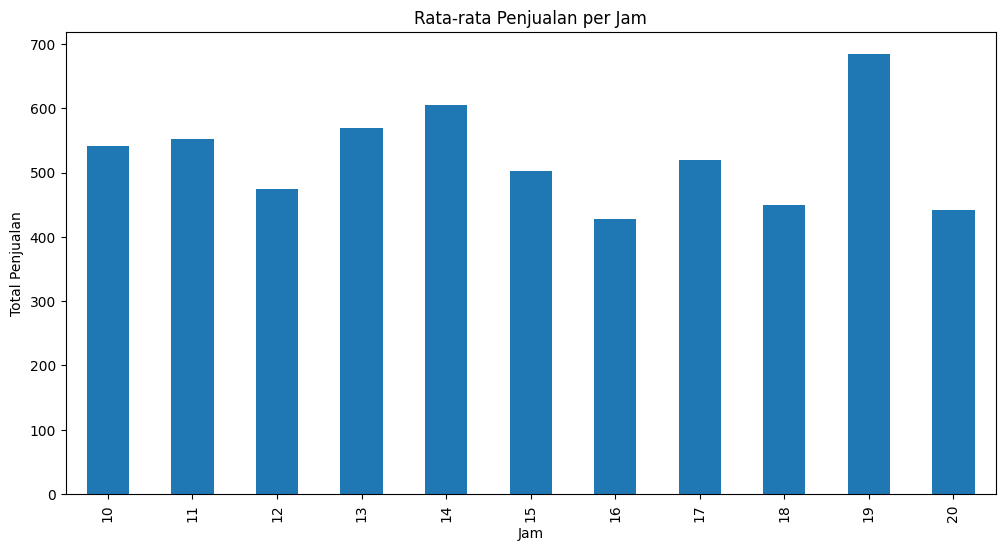

Waktu eksekusi serial: 0.09 detik


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import dask.dataframe as dd

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
ddf = dd.from_pandas(df, npartitions=4)
ddf['Date'] = dd.to_datetime(ddf['Date'])
ddf['Time'] = dd.to_datetime(ddf['Time'])

# Pendekatan Paralel
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales
def pararel():
  result = ddf.groupby('Date').apply(analyze_hourly_pattern, meta=pd.Series(dtype='float64')).compute()
  avg_hourly_sales = result.groupby(level=1).mean()
  return avg_hourly_sales

end_time = time.time()

#Visualisasi
plt.figure(figsize=(12, 6))
pararel().plot(kind='bar')
plt.title('Rata-rata Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()
#Waktu
print(f"Waktu eksekusi serial: {end_time - start_time:.2f} detik")

<ipython-input-54-5742971f24b3>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


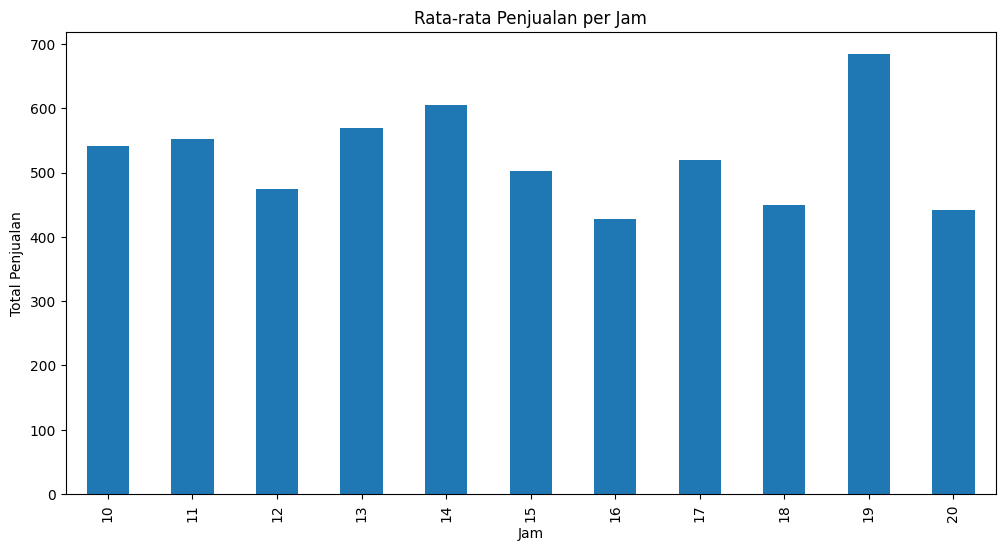

Waktu eksekusi paralel: 0.44 detik


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import multiprocessing as mp

# Baca dataset
start_time = time.time()
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Fungsi untuk menganalisis pola per jam
def analyze_hourly_pattern(group):
    hourly_sales = group.groupby(group['Time'].dt.hour)['Total'].sum()
    return hourly_sales

# Fungsi untuk diparalelkan
def process_date(date_group):
    date, group = date_group
    return analyze_hourly_pattern(group)

# Paralel dengan multiprocessing
if __name__ == '__main__':
    with mp.Pool(mp.cpu_count()) as pool:
        grouped = df.groupby('Date')
        result_list = pool.map(process_date, grouped)

    # Menggabungkan hasil
    paralel_result = pd.concat(result_list, keys=[g[0] for g in grouped])
    avg_hourly_sales = paralel_result.groupby(level=1).mean()

    end_time = time.time()

    # Visualisasi
    plt.figure(figsize=(12, 6))
    avg_hourly_sales.plot(kind='bar')
    plt.title('Rata-rata Penjualan per Jam')
    plt.xlabel('Jam')
    plt.ylabel('Total Penjualan')
    plt.show()

    # Waktu eksekusi
    print(f"Waktu eksekusi paralel: {end_time - start_time:.2f} detik")
